# Fashion MNIST 

### In this part of the project, we will use a couple of methods:
    
#####       - Tensorflow for data importation
#####       - Visualization for deeper understaing of the data 
#####       - PCA for compression
#####       - Models and the use of accuracy score for Classification of the data
#####       - Testing the chosen model

### First, we will import the necessary libraries:

In [663]:
#Importing the basic libraries
import numpy as np 
import pandas as pd
import seaborn
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#Importing libraries for the data importation
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import tensorflow_datasets as tfds

#Importing libraries for the models
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Now, we will import the data using Keras and split into train and test:

In [664]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### Data visualization:

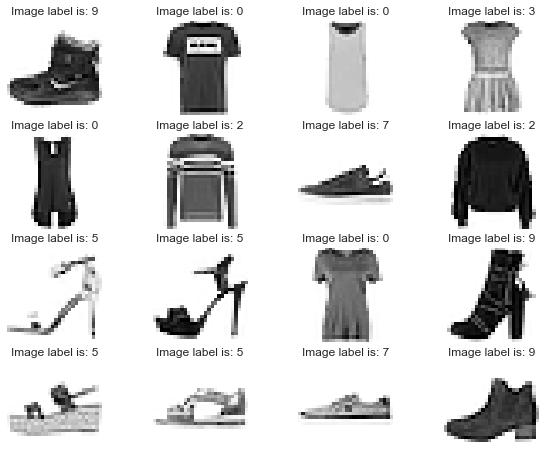

In [665]:
plt.figure(figsize=(10,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()

Here we can see that each image has a label of a number between 0 and 9. 

Each number represents which clothing wear is shown, and by so will easily help us classify each image.

Label Description: 
    
    0 T-shirt/top 
    1 Trouser 
    2 Pullover 
    3 Dress 
    4 Coat 
    5 Sandal 
    6 Shirt 
    7 Sneaker 
    8 Bag 
    9 Ankle boot

##### In the following visualization you can see the images in grayscale. Here they may seem a little clearer.

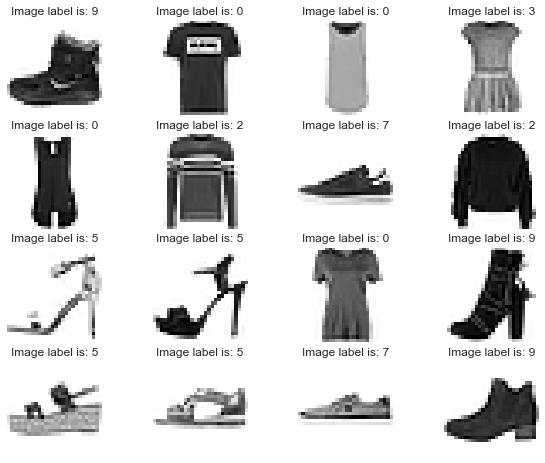

In [666]:
plt.figure(figsize=(10,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()

##### Now, we will use a plot in order to compare the number of images in each class:

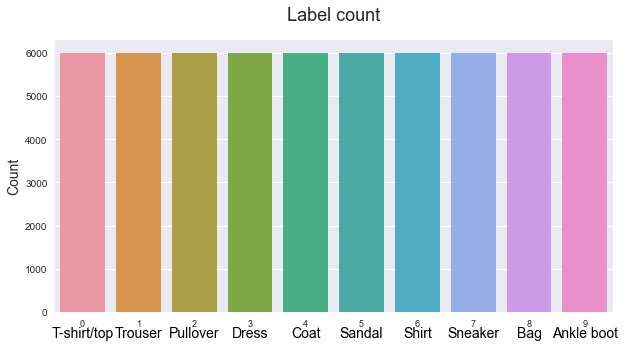

In [667]:
dictionary = {
    0 :'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

#Plot
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.countplot(x=y_train, ax = ax)

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 9)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);

Each label has six-thousand samples and so the classes are balanced!

### Data Size

In [668]:
print(y_train)
print("y_train shape is", y_train.shape)

[9 0 0 ... 3 0 5]
y_train shape is (60000,)


The labels are an array of integers, ranging from 0 to 9.

In [669]:
print(X_train)
print("X_train shape is", X_train.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
X_train shape is (60000, 28, 28)


From this information we understand that this is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 

### Changing the dimensions of the data

Now, in order to work with the data, we will need to reshape it from 2D arrays (images represented as 28X28 arrays), into 1D arrays, sized 784.

This way, each image will have 784 features, while each feature will represent a pixels' intensity (from 0 to 255, meaning from white to black).

Each instance's feature vector will have similarities to other vectors, and so we will use that similarity in order to classify other images as the same clothing wear.

In [670]:
x_train = X_train.reshape(-1, 28*28)/255
x_test=X_test.reshape(-1, 28*28)/255
print("x_test shape is", x_test.shape)
print("x_train shape is", x_train.shape)

x_test shape is (10000, 784)
x_train shape is (60000, 784)


As the dimension of each image was 28x28, we now realize that the entire database got reshaped using the format [-1 (all elements), height * width]

### Dimensionality Reduction using PCA

We need dimensionality reduction so the training set won't take up much space and slow down the classification algorithms>

In order to choose the right number of dimensions to reduce down to, we will require a preservation of 95% of the variance.

Variance refers to the spread of the data set.

In [671]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
this = np.argmax(cumsum >= 0.95) + 1
print("Number of features required for preservation of 95% of the variance is ", this)

Number of features required for preservation of 95% of the variance is  187


Now, we will implement the PCA and then decompress the reduced dataset back to 784 dimensions, using inverse transformation of the PCA projection

In [672]:
pca = PCA(n_components = 187)
X_reduced = pca.fit_transform(x_train)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

In [673]:
X_test_reduced = pca.fit_transform(x_test)
X_test_recovered = pca.inverse_transform(X_test_reduced)
X_test_recovered.shape

(10000, 784)

Visualizing the outcome:

Text(0.5, 1.0, 'Compressed')

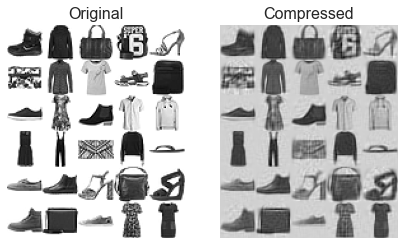

In [674]:
def plot_digits(instances, images_p_row=5, **options):
    size = 28
    images_p_row = min(len(instances), images_p_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_p_row + 1
    row_images = []
    n_empty = n_rows * images_p_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_p_row : (row + 1) * images_p_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

#Plotting the original dataset
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2000])
plt.title("Original", fontsize=16)

#Plotting the compressed dataset
plt.subplot(122)
plot_digits(X_recovered[::2000])
plt.title("Compressed", fontsize=16)

We can see that the projection lost some information, but it is quite close to the original data.

### The Models

We will be comparing three classifying models: Logistic Regression, Decision Tree and Random Forest. 
The 2 models with the best score will be used in the Soft Voting Classifier Model.
The model with the highest score will be put to the test.

Our scoring method is the Accuracy Classification Score.
Accuracy counts the number of data points in the test set that have been predicted correctly, and returns that number as a fraction of the test set size.

#### Logistic Regression Classifier

Linear regression analysis is used to predict the value of a variable based on the value of another variable.

In [676]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_recovered, y_train)
y_train_predict = lr.predict(X_recovered)

print("Logistic Regression Accuracy: ", accuracy_score(y_train, y_train_predict))

Logistic Regression Accuracy:  0.8601666666666666


#### Decision Tree Classifier

The Decision Tree Classifier acquires knowledge in the form of a tree, which can also be rewritten as a set of discrete rules to make it easier to understand.

In [677]:
dec_tree = DecisionTreeClassifier(max_depth=20, random_state=42)
dec_tree.fit(X_recovered, y_train)
y_train_predict = dec_tree.predict(X_recovered)

print("Decision Tree Accuracy: ", accuracy_score(y_train, y_train_predict))

Decision Tree Accuracy:  0.9831833333333333


#### Random Forest Classifier

Random forest is an ensemble tool which takes a subset of observations and a subset of variables to build a decision trees. It builds multiple such decision tree and merge them together to get a more accurate and stable prediction. 

n_estimators represents the number of trees you want to build before taking the maximum voting or averages of predictions.
max_depth represents the maximum depth of each tree in the forest.

In [678]:
rnd = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rnd.fit(X_recovered, y_train)
y_train_predict = rnd.predict(X_recovered)

print("Random Forest Accuracy: ", accuracy_score(y_train, y_train_predict))

Random Forest Accuracy:  0.9924666666666667


We will use the classifiers with the best results in order to implement the Soft Voting Classifier.

#### Soft Voting Classifier 

Voting classifier takes majority voting based on weights applied to the class or class probabilities and assigns a label based on majority vote.

Soft voting classifier classifies input data based on the probabilities of all the predictions made by different classifiers.

In [687]:
voting_clf = VotingClassifier(estimators=[('dt', dec_tree), ('rf', rnd)], voting='soft')

voting_clf.fit(X_recovered, y_train)
y_train_predict = voting_clf.predict(X_recovered)

print("Soft Voting Accuracy: ", accuracy_score(y_train, y_train_predict))

Soft Voting Accuracy:  0.9862166666666666


### Testing the chosen model

The accuracy score of the Random Forest Classifier was the highest out of the four models. Therefore, we chose to test this model.

In [684]:
rnd = RandomForestClassifier(n_estimators=50, max_depth=25, random_state=42)
rnd.fit(X_recovered, y_train)
y_test_predict = rnd.predict(X_test_recovered)

print("Random Forest Classifier Accuracy: ", accuracy_score(y_test, y_test_predict))

Random Forest Classifier Accuracy:  0.8617


We got approximately 86% accuracy in the test. We were not expecting a high score because we didn't use Nueral Networks for this classification. 